Desicion tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
data=pd.read_csv('Final.csv')
# Assuming 'data' is your DataFrame
X = data[['Age', 'Gender', 'Skin Type', 'Acne', 'Aging', 'Dark spots', 'Dryness', 'Uneven']]
y = data['Product']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some algorithms like Decision Trees)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Decision Tree Accuracy: 0.85
Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.75      0.86        12
           3       1.00      0.83      0.91         6
           4       0.83      1.00      0.91         5
           5       0.73      1.00      0.84         8
           6       0.86      0.86      0.86         7
           7       1.00      1.00      1.00         5
           8       0.67      1.00      0.80         4
           9       1.00      0.43      0.60         7
          10       0.75      1.00      0.86         6

    accuracy                           0.85        60
   macro avg       0.87      0.87      0.85        60
weighted avg       0.89      0.85      0.84        60

Decision Tree Confusion Matrix:
[[9 0 1 0 0 0 2 0 0]
 [0 5 0 0 1 0 0 0 0]
 [0 0 5 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0]
 [0 0 0 1 6 0 0 0 0]
 [0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 4 0 0]
 [0 0 0 2 0 0 0 3 2]
 [0 0 0 0 0 0 0 0 6]]


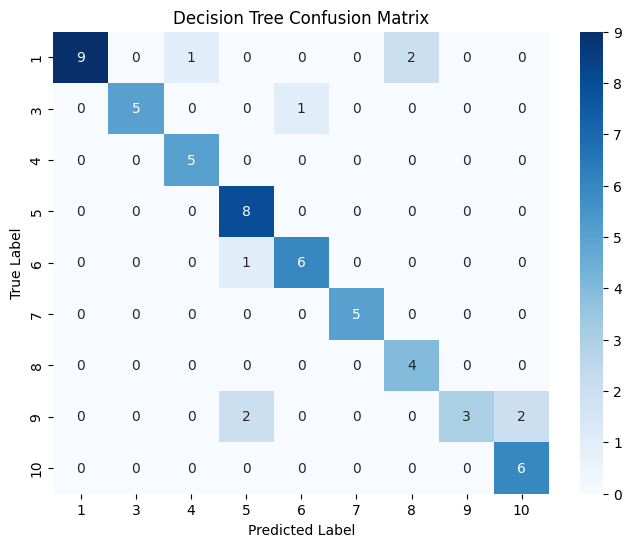

In [ ]:

# Train a Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)

# Evaluate the decision tree model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Accuracy: {accuracy_decision_tree}")

# Display classification report for more detailed evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))

# Generate and display the confusion matrix
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
print("Decision Tree Confusion Matrix:")
print(conf_matrix_decision_tree)

# Create a heatmap for graphical representation of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt="d", cmap="Blues", xticklabels=decision_tree_model.classes_, yticklabels=decision_tree_model.classes_)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
